In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No null value present in the dataset

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

The data types of the columns are shown in above. There are one integer type column, two object type column and nine float type columns in the dataset.

In [5]:
df.shape

(158, 12)

There are 158 rows and 12 columns in the dataset

Data Visualization

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


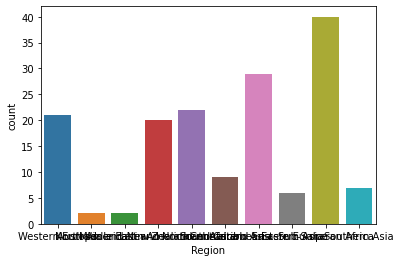

In [6]:
sn.countplot(df['Region'])
print(df['Region'].value_counts())

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

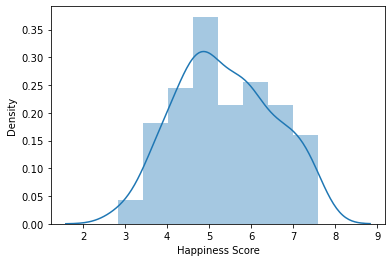

In [7]:
sn.distplot(df['Happiness Score'])

data in Happiness score is normally distributed

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

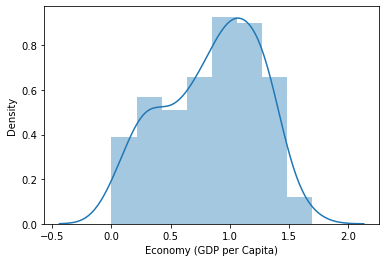

In [8]:
sn.distplot(df['Economy (GDP per Capita)'])

Data normally distributed in Economy

<AxesSubplot:xlabel='Family', ylabel='Density'>

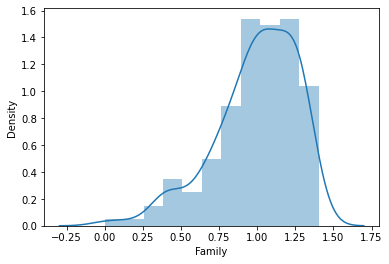

In [9]:
sn.distplot(df['Family'])

Data not normally distributed left skewness is present

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

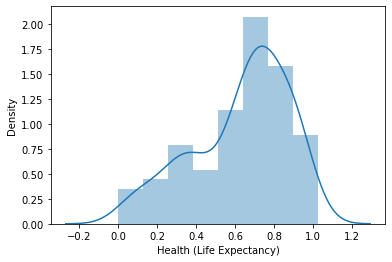

In [10]:
sn.distplot(df['Health (Life Expectancy)'])

Data not normally distributed

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

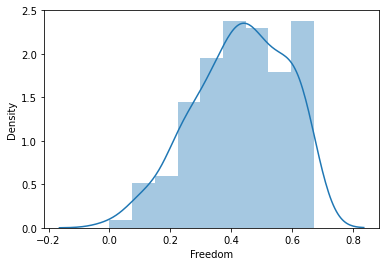

In [11]:
sn.distplot(df['Freedom'])

Data normally distributed

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

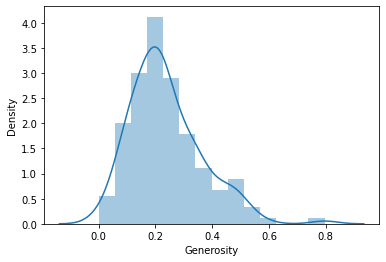

In [12]:
sn.distplot(df['Generosity'])

Data not normally distributed, Skewness is present

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

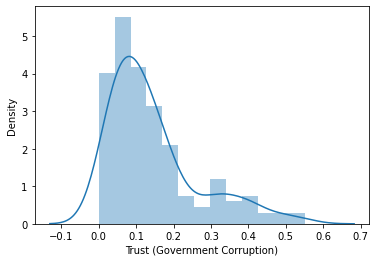

In [13]:
sn.distplot(df['Trust (Government Corruption)'])

Data not normally distributed, Skewness is present

<AxesSubplot:xlabel='Family'>

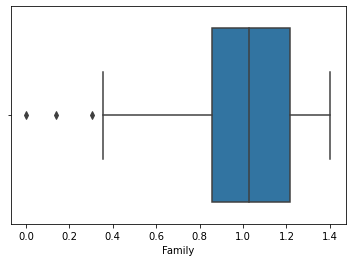

In [14]:
sn.boxplot(df['Family'])

Outliers are present in Family

<AxesSubplot:xlabel='Health (Life Expectancy)'>

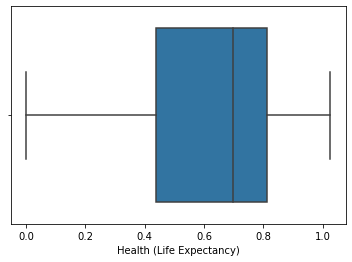

In [15]:
sn.boxplot(df['Health (Life Expectancy)'])

Outliers are not present in Health

<AxesSubplot:xlabel='Freedom'>

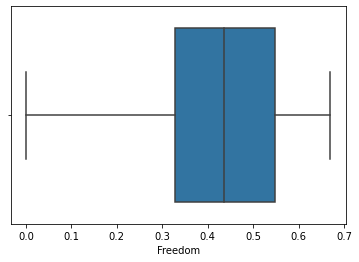

In [16]:
sn.boxplot(df['Freedom'])

Outliers are not present in Freedom

<AxesSubplot:xlabel='Trust (Government Corruption)'>

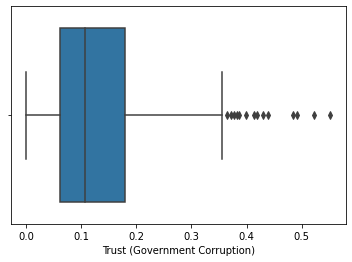

In [17]:
sn.boxplot(df['Trust (Government Corruption)'])

Outliers are present in Trust

<AxesSubplot:xlabel='Generosity'>

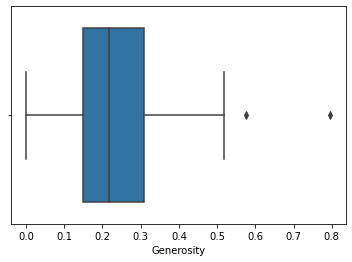

In [18]:
sn.boxplot(df['Generosity'])

Outliers are present in Generosity

Encoding the Dataframe

In [19]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [20]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [21]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [22]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

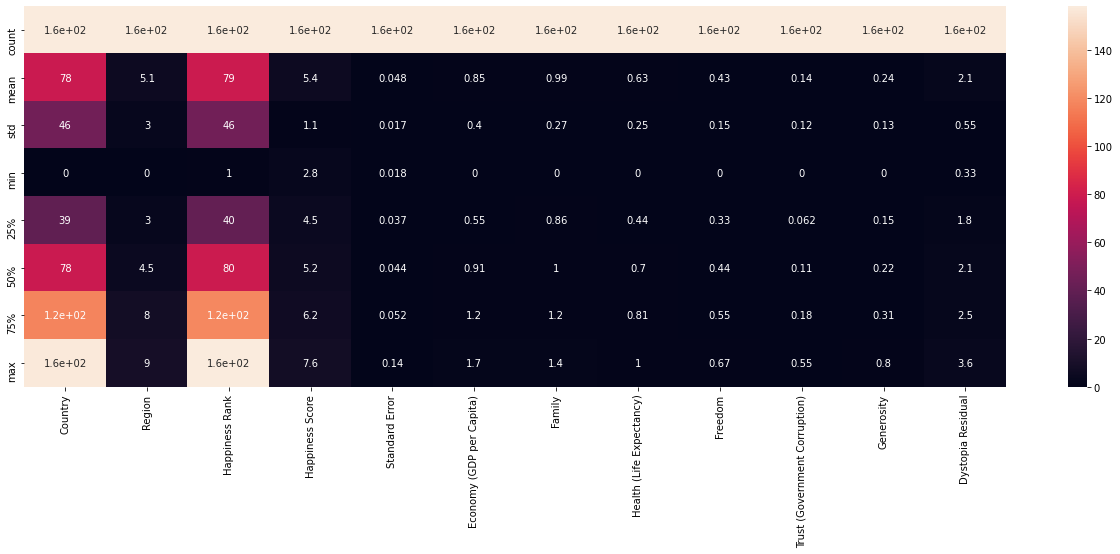

In [23]:
plt.figure(figsize=(22,7))
sn.heatmap(df.describe(),annot=True)

In [24]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [25]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

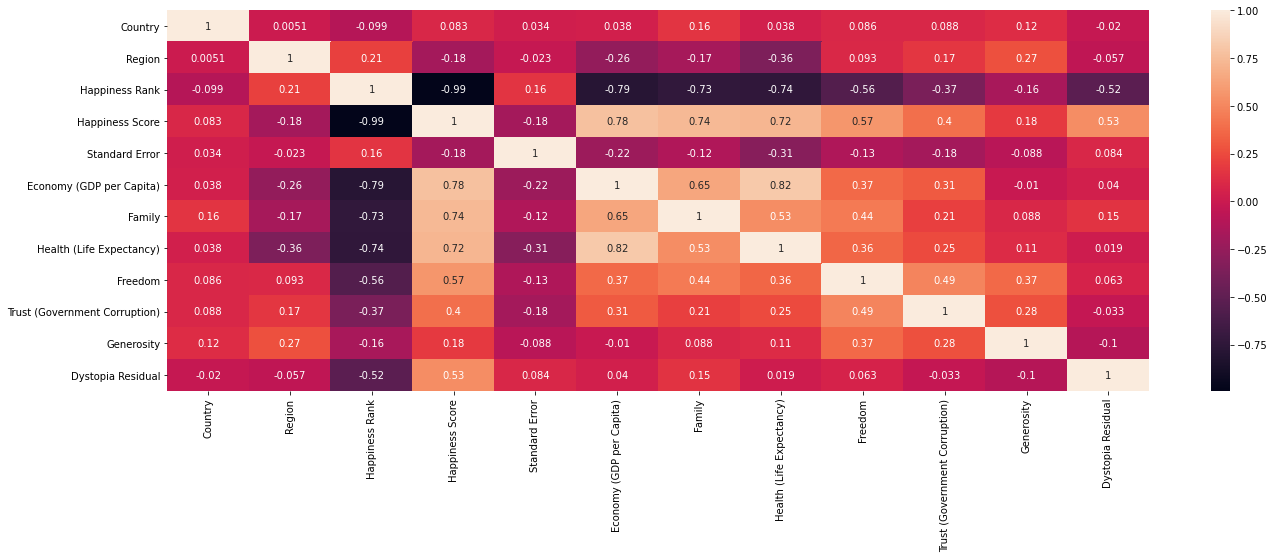

In [26]:
plt.figure(figsize=(22,7))
sn.heatmap(df.corr(),annot=True)

Removing Outliers

In [27]:
df.shape

(158, 12)

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

In [29]:
df_new=df[(z<3).all(axis=1)]
Df=df_new
Df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [30]:
data_loss=((158-149)/158)*100
data_loss

5.69620253164557

5% data loss after ouliers removed

In [31]:
#Seperating the feature and target
x=Df.iloc[:,5:11]
y=Df.iloc[:,3]

In [32]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260


In [33]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=40)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
lr.score(x_train,y_train)

0.8562503173354873

In [37]:
pred=lr.predict(x_test)
print("The predicted price : ",pred)
print("The actual price :",y_test)

The predicted price :  [5.56172599 5.93412956 3.67077219 3.95609394 5.34074595 4.51271246
 7.05765781 5.78309587 5.91025365 5.8775014  3.97680002 6.12984454
 5.41269423 5.64800641 5.22446575 3.55336352 5.09530364 4.70993974
 5.34089978 5.04563177 4.23567841 4.03441677 5.56877984 7.25068474
 5.34722295 6.74816014 5.68211739 4.50343951 7.3053008  4.52383632
 6.22603724 7.23048764 6.13427606 5.08079947 7.39751736 5.41280262
 7.19062209 5.92545017 4.48644962 5.89249872 7.3802612  5.35369627
 4.29325805 4.63962481 3.29645775 5.16010221 4.05860282 5.04959483
 5.72715654 6.71292104]
The actual price : 39     6.269
69     5.548
119    4.517
121    4.512
92     5.007
140    3.931
71     5.474
97     4.885
87     5.102
29     6.574
93     4.971
11     7.226
42     6.123
131    4.271
82     5.192
149    3.656
127    4.332
129    4.297
79     5.212
61     5.759
136    4.033
108    4.694
55     5.833
17     6.940
67     5.605
18     6.937
13     7.187
120    4.514
9      7.284
84     5.129
65     5

The predicted value and the actual value is printed above

In [38]:
print(r2_score(y_test,pred))
print("Error ",mean_squared_error(y_test,pred))

0.6084629674835432
Error  0.47815235744110135


Regularization

In [39]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8561436108883995

In [40]:
ls.coef_

array([1.22646214, 1.24802368, 0.8024623 , 0.79211004, 1.38714637,
       1.00384075])

In [41]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8562503171453897

In [42]:
rd.coef_

array([1.21287267, 1.25192543, 0.82911475, 0.78853462, 1.45757652,
       1.0506261 ])

In [43]:
import pickle
filename='Happiness.pkl'
pickle.dump(rd,open(filename,'wb'))

model saved